<a href="https://colab.research.google.com/github/jameslee98331/METIIB-CUH-LP/blob/master/tf_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
import random

print(tf.version.VERSION)
drive.mount('/content/gdrive')


2.2.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def view_img(image):
    plt.imshow(image)
    plt.show()

Loading your own dataset:

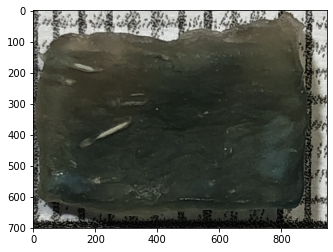

/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/Images/cleaned/clean_IMG_7333.JPG
(701, 946, 3)


In [5]:
DATADIR = '/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/Images'
folder = os.path.join(DATADIR, 'cleaned')

for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_array = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    view_img(img_array)
    print(img_path)
    print(img_array.shape)
    break

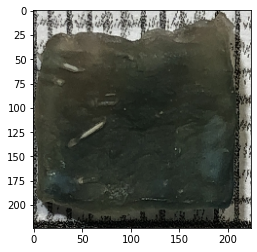

In [17]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
view_img(new_array)

In [0]:
DATADIR = '/content/gdrive/My Drive/MET IIB 2019-2020/PROJECTS/LONG PROJECT/5. Image Classifier/Images/tf_src'
CATEGORIES = ['bottom', 'top']
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img_name))
                IMG_SIZE = 150
                new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()


In [8]:
print(len(training_data))

116


In [0]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
1
1
1
0
1
0


In [0]:
# Feature set
X = []

# Label set
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [13]:
X[1]

array([[[220, 224, 222],
        [219, 221, 221],
        [215, 217, 217],
        ...,
        [222, 226, 227],
        [222, 227, 226],
        [209, 214, 213]],

       [[215, 219, 218],
        [222, 224, 224],
        [217, 220, 218],
        ...,
        [214, 218, 219],
        [215, 220, 219],
        [221, 226, 225]],

       [[220, 224, 223],
        [211, 213, 213],
        [220, 225, 223],
        ...,
        [222, 230, 230],
        [222, 228, 228],
        [218, 222, 223]],

       ...,

       [[204, 206, 206],
        [206, 209, 207],
        [209, 212, 210],
        ...,
        [208, 210, 211],
        [210, 212, 213],
        [209, 211, 212]],

       [[206, 209, 207],
        [205, 208, 206],
        [212, 215, 213],
        ...,
        [210, 214, 215],
        [210, 209, 211],
        [214, 215, 219]],

       [[211, 214, 212],
        [207, 210, 208],
        [211, 214, 212],
        ...,
        [209, 213, 214],
        [208, 207, 209],
        [216, 217, 221]]

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X/255.0

model = Sequential()

# Layer 1
model.add(Conv2D(128, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model.add(Flatten())
model.add(Dense(128))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=1, epochs=10, validation_split=0.1)


Epoch 1/10
104/104 [==============================] - 1s 7ms/step - loss: 2.2502 - accuracy: 0.4615 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
104/104 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
104/104 [==============================] - 1s 5ms/step - loss: 0.6950 - accuracy: 0.4615 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.4167
Epoch 5/10
104/104 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.4423 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/10
104/104 [==============================] - 1s 5ms/step - loss: 0.8874 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
104/104 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.4808 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [23]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [24]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________